In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Function to perform data standardization 
from sklearn.preprocessing import StandardScaler

# Libraries to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor ## Random Forest Regressor
from sklearn.neighbors import KNeighborsRegressor ## KNN regressor
from sklearn.tree import DecisionTreeRegressor ## Decision Tree Regressor
# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae


sns.set_style("whitegrid")
sns.set_palette("Blues_d")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['BlackFriday.csv']


In [62]:
df = pd.read_csv('../input/BlackFriday.csv')
df.shape

(537577, 12)

In [63]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [64]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [65]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [66]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [67]:
df.dtypes[df.dtypes == 'object']

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

In [68]:
df.describe(include="object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


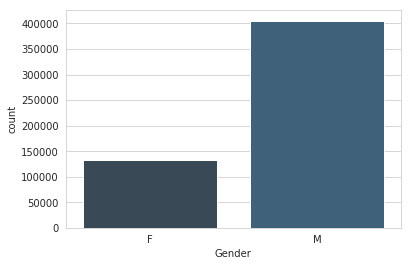

In [69]:
sns.countplot(x='Gender', data=df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


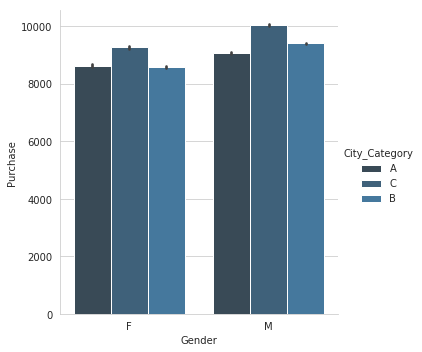

In [70]:
sns.catplot(x="Gender", y="Purchase", hue="City_Category", kind="bar", data=df,);


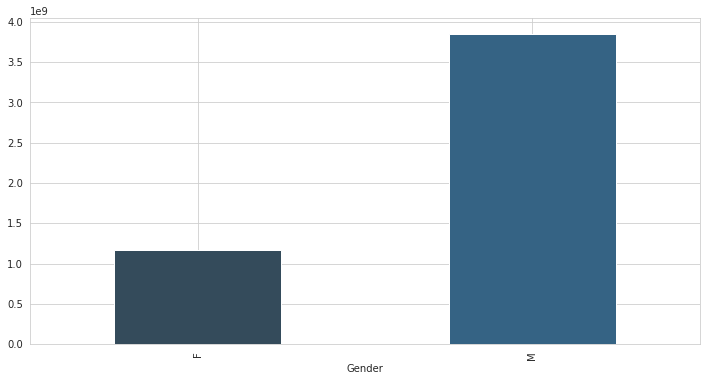

In [71]:
def plot(group,column,plot):
    ax=plt.figure(figsize=(12,6))
    df.groupby(group)[column].sum().sort_values().plot(plot)
    
plot('Gender','Purchase','bar')

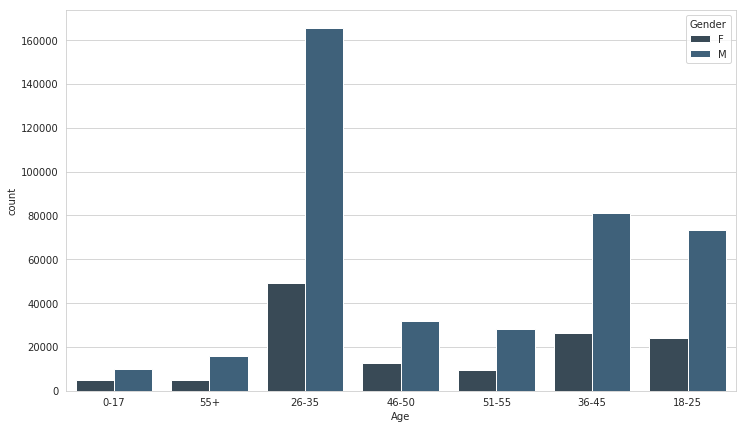

In [72]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df['Age'],hue=df['Gender'])

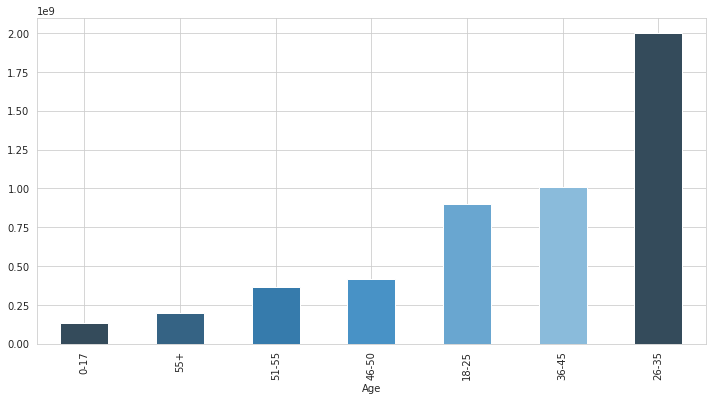

In [13]:
plot('Age','Purchase','bar')

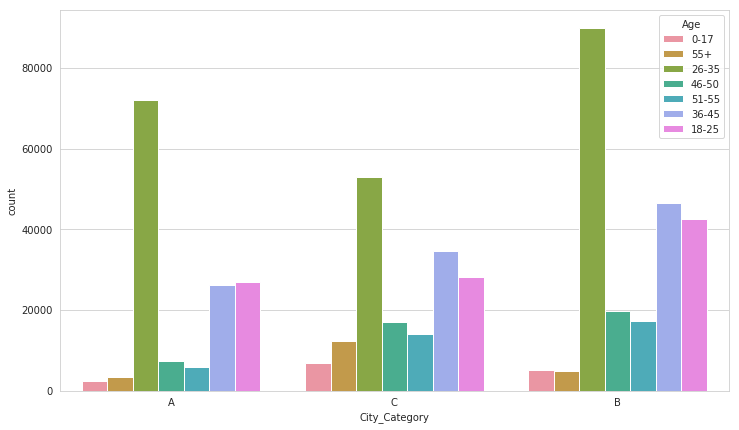

In [14]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df['City_Category'],hue=df['Age'])

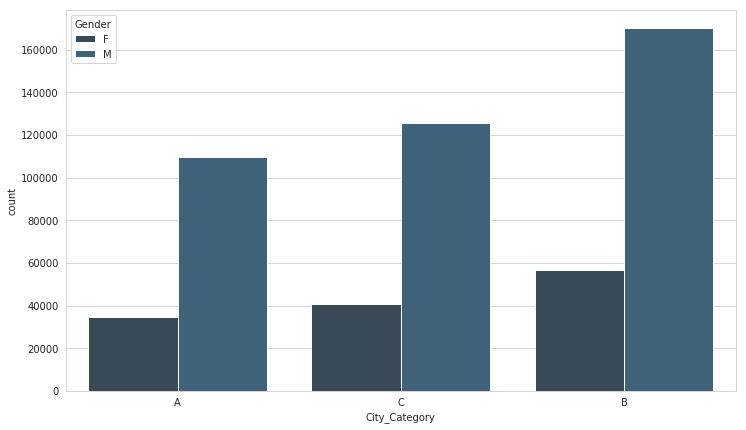

In [15]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df['City_Category'],hue=df['Gender'])

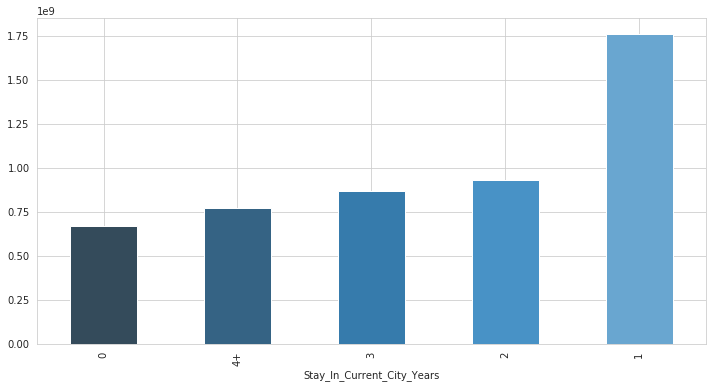

In [16]:
plot('Stay_In_Current_City_Years','Purchase','bar')

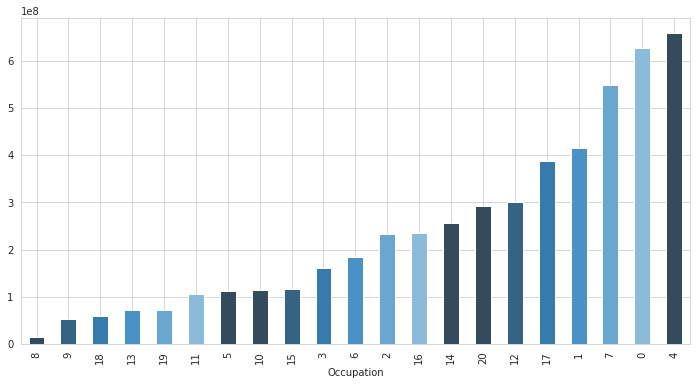

In [17]:
plot('Occupation','Purchase','bar')

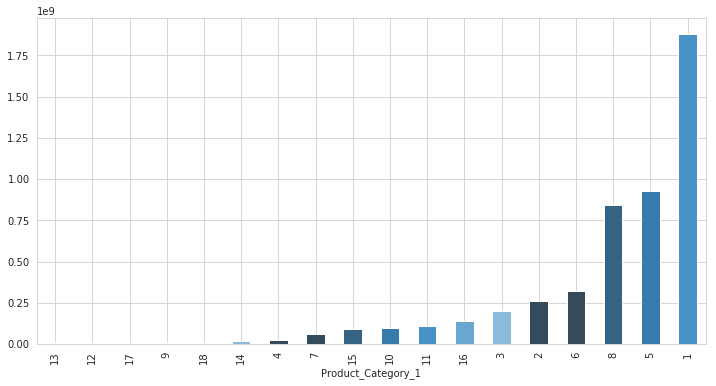

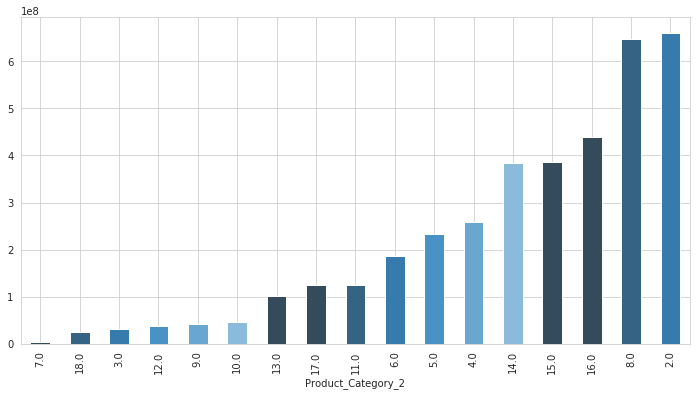

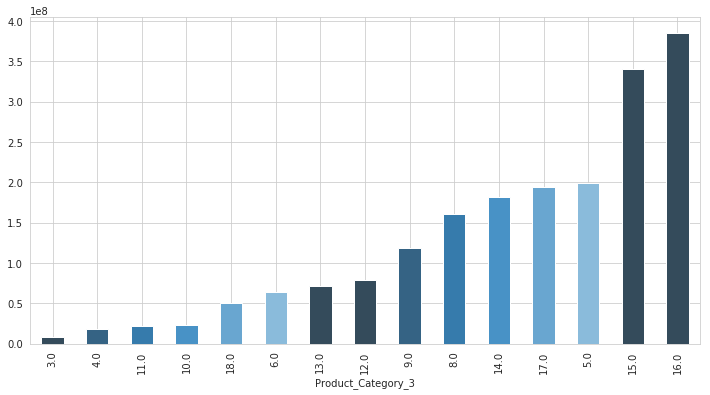

In [18]:
plot('Product_Category_1','Purchase','bar')
plot('Product_Category_2','Purchase','bar')
plot('Product_Category_3','Purchase','bar')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


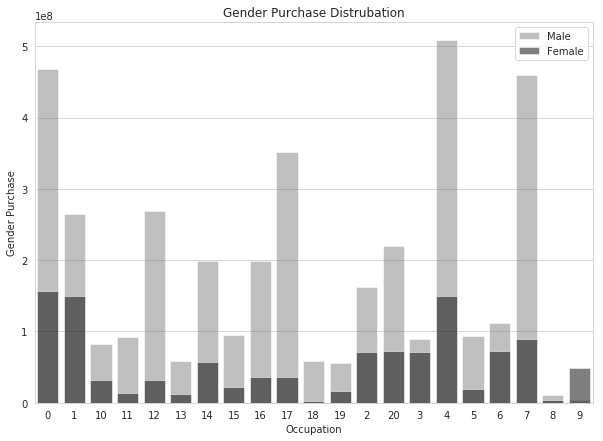

In [19]:
# Gender and occupation spend more money
df_ogp = df[['Occupation', 'Gender', 'Purchase']]
df_ogp.Occupation = df_ogp.Occupation.astype(str)
occulist = list(df_ogp.Occupation.unique())
male = []
female = []
for occu in occulist:
    df_ogp_temp = df_ogp[df_ogp.Occupation == occu]
    male.append(df_ogp_temp[df_ogp_temp.Gender=='M']['Purchase'].sum())
    female.append(df_ogp_temp[df_ogp_temp.Gender=='F']['Purchase'].sum())
df_occupurgen = pd.DataFrame({'Occupation':occulist,'male':male, 'female':female})
#Visualization

plt.subplots(figsize = (10,7))
sns.barplot(x = df_occupurgen.Occupation, y = df_occupurgen.male, 
            alpha = 0.5, label = 'Male', color = 'grey')
sns.barplot(x = df_occupurgen.Occupation, y = df_occupurgen.female,
            alpha = 0.5, label = 'Female', color= 'black')
plt.title('Gender Purchase Distrubation')
plt.xlabel('Occupation')
plt.ylabel('Gender Purchase')
plt.legend()
plt.show()

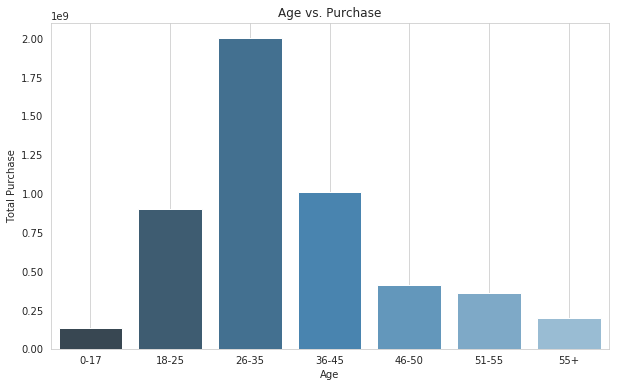

In [20]:
df.replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],[0,1,2,3,4,5,6],inplace=True)
agelist = list(df.Age.unique())
purchasesum=[]
for age in agelist:
    purchasesum.append(df[df.Age == age].Purchase.sum())
fig, ax =plt.subplots(figsize=(10,6))
sns.barplot(x=agelist,y=purchasesum, palette="Blues_d")
ax.set_xticklabels(['0-17','18-25','26-35','36-45','46-50','51-55','55+'])
plt.title('Age vs. Purchase')
plt.xlabel('Age')
plt.ylabel('Total Purchase')
plt.grid()
plt.show()

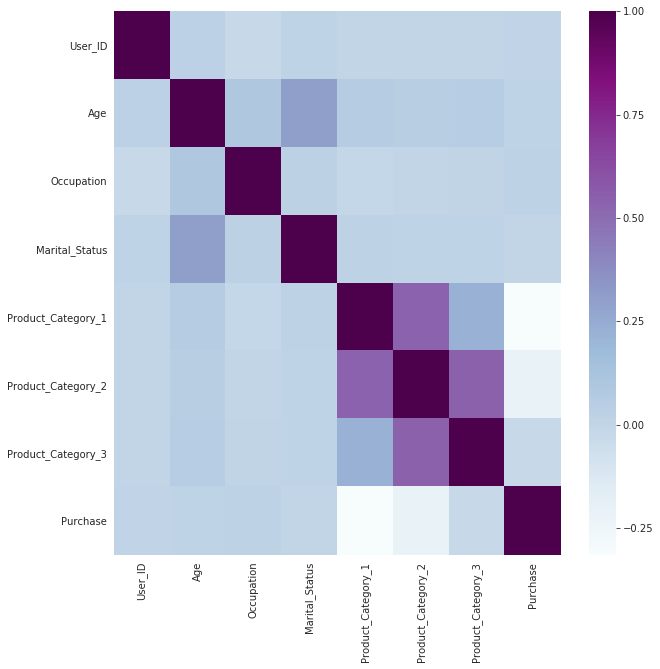

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="BuPu")

# **Data Cleaning and Prepration**

* Filtering the data
* Indicator Variables
* Encoding Dummy Variables

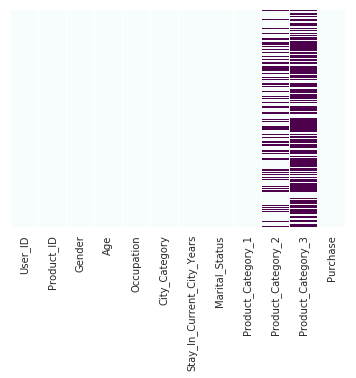

In [73]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'BuPu', )
plt.show()

In [74]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [75]:
df.Product_Category_2.fillna(0, inplace=True)
df.Product_Category_2.unique()


array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [76]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [77]:
df.Product_Category_3.fillna(0, inplace=True)
df.Product_Category_3.unique()

array([ 0., 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [78]:
df = df.drop_duplicates()
print( df.shape )

(537577, 12)


In [79]:
df.select_dtypes(exclude=['object']).isnull().sum()

User_ID               0
Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
dtype: int64

In [80]:
def gender(x):
    if x=='M':
        return 1
    return 0

df['Gender']=df['Gender'].map(gender)

In [81]:
def agegroup(x):
    if x=='0-17':
        return 1
    elif x=='18-25':
        return 2
    elif x ==  "26-35" :
        return 3
    elif x ==  "36-45" :
        return 4
    elif x ==  "46-50" :
        return 5
    elif x ==  "51-55" :
        return 6
    elif x ==  "55+" :
        return 7
    else:
        return 0
    
df['AgeGroup']=df['Age'].map(agegroup)

In [82]:
df.drop(['Age'],axis=1,inplace=True)

In [83]:
df['Bachelor']=((df.AgeGroup == 2) & (df.Marital_Status == 0) & (df.Gender == 1)).astype(int)

In [84]:
df[df['Bachelor']==1].shape[0]/df.shape[0] 

0.10985030981608217

In [86]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
AgeGroup                      0
Bachelor                      0
dtype: int64

In [87]:
P = LabelEncoder()
df['Product_ID'] = P.fit_transform(df['Product_ID'])
U = LabelEncoder()
df['User_ID'] = P.fit_transform(df['User_ID'])


In [88]:
df = pd.get_dummies(df, columns=['City_Category', 'Stay_In_Current_City_Years'])


In [89]:
df.shape

(537577, 19)

In [90]:
df.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,AgeGroup,Bachelor,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,670,0,10,0,3,0.0,0.0,8370,1,0,1,0,0,0,0,1,0,0
1,0,2374,0,10,0,1,6.0,14.0,15200,1,0,1,0,0,0,0,1,0,0
2,0,850,0,10,0,12,0.0,0.0,1422,1,0,1,0,0,0,0,1,0,0
3,0,826,0,10,0,12,14.0,0.0,1057,1,0,1,0,0,0,0,1,0,0
4,1,2732,1,16,0,8,0.0,0.0,7969,7,0,0,0,1,0,0,0,0,1


In [93]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Occupation                       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
AgeGroup                         0
Bachelor                         0
City_Category_A                  0
City_Category_B                  0
City_Category_C                  0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

# ** Machine Learning Models**

* Test Train Split
* Data Standardization

In [94]:
sample_df = df.sample(n=50000,random_state=100)

In [95]:
# Create separate object for target variable
y = sample_df.Purchase
# Create separate object for input features
X = sample_df.drop('Purchase', axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [97]:
train_mean = X_train.mean()
train_std = X_train.std()
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

In [98]:
X_train.describe()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,AgeGroup,Bachelor,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04
mean,-1.253234e-16,9.057685e-18,-1.578737e-15,1.217720e-16,-2.154688e-15,2.553890e-15,9.393097e-16,3.112594e-16,-2.102984e-16,3.280626e-16,-6.734890e-16,5.285727e-15,-1.504025e-15,-1.992503e-15,1.981526e-16,9.853368e-16,8.897327e-17,5.581813e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.745590e+00,-1.693693e+00,-1.763061e+00,-1.249694e+00,-8.327011e-01,-1.145847e+00,-1.088334e+00,-6.193374e-01,-1.841441e+00,-3.550040e-01,-6.113965e-01,-8.489017e-01,-6.688228e-01,-3.928918e-01,-7.373417e-01,-4.794717e-01,-4.573271e-01,-4.269345e-01
25%,-8.783307e-01,-7.645571e-01,5.671810e-01,-9.425347e-01,-8.327011e-01,-1.145847e+00,-1.088334e+00,-6.193374e-01,-3.569766e-01,-3.550040e-01,-6.113965e-01,-8.489017e-01,-6.688228e-01,-3.928918e-01,-7.373417e-01,-4.794717e-01,-4.573271e-01,-4.269345e-01
50%,1.821552e-02,-4.522602e-02,5.671810e-01,-1.746356e-01,-8.327011e-01,-8.220612e-02,-2.852422e-01,-6.193374e-01,-3.569766e-01,-3.550040e-01,-6.113965e-01,-8.489017e-01,-6.688228e-01,-3.928918e-01,-7.373417e-01,-4.794717e-01,-4.573271e-01,-4.269345e-01
75%,8.364633e-01,8.379526e-01,5.671810e-01,9.004231e-01,1.200881e+00,7.155243e-01,1.160323e+00,6.537669e-01,3.852557e-01,-3.550040e-01,1.635559e+00,1.177963e+00,1.495127e+00,-3.928918e-01,1.356189e+00,-4.794717e-01,-4.573271e-01,-4.269345e-01
max,1.774848e+00,1.924942e+00,5.671810e-01,1.821902e+00,1.200881e+00,3.374626e+00,1.802797e+00,2.245147e+00,2.611953e+00,2.816799e+00,1.635559e+00,1.177963e+00,1.495127e+00,2.545166e+00,1.356189e+00,2.085577e+00,2.186564e+00,2.342221e+00


In [99]:
X_test.describe()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,AgeGroup,Bachelor,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.010850,-0.016743,-0.021438,-0.012102,0.001271,-0.017032,0.005011,0.009274,-0.005975,-0.007692,-0.009887,0.010894,-0.002110,0.004627,-0.004187,0.026869,-0.012625,-0.014607
std,1.002734,1.008719,1.012549,1.003940,1.000271,0.992683,1.000251,1.000007,1.000403,0.990494,0.994912,1.001769,0.999163,1.004995,0.998732,1.021035,0.988981,0.985841
min,-1.743199,-1.693693,-1.763061,-1.249694,-0.832701,-1.145847,-1.088334,-0.619337,-1.841441,-0.355004,-0.611397,-0.848902,-0.668823,-0.392892,-0.737342,-0.479472,-0.457327,-0.426935
25%,-0.904032,-0.776546,-1.763061,-0.942535,-0.832701,-1.145847,-1.088334,-0.619337,-0.356977,-0.355004,-0.611397,-0.848902,-0.668823,-0.392892,-0.737342,-0.479472,-0.457327,-0.426935
50%,0.009250,-0.067206,0.567181,-0.174636,-0.832701,-0.082206,-0.285242,-0.619337,-0.356977,-0.355004,-0.611397,-0.848902,-0.668823,-0.392892,-0.737342,-0.479472,-0.457327,-0.426935
75%,0.827498,0.809229,0.567181,0.900423,1.200881,0.715524,1.160323,0.653767,0.385256,-0.355004,1.635559,1.177963,1.495127,-0.392892,1.356189,-0.479472,-0.457327,-0.426935
max,1.774848,1.923943,0.567181,1.821902,1.200881,3.374626,1.802797,2.245147,2.611953,2.816799,1.635559,1.177963,1.495127,2.545166,1.356189,2.085577,2.186564,2.342221


 **Base Model**

In [102]:
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [103]:
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [104]:
print("Train Results for Baseline Model:")
print("*******************************")
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
R-squared:  0.0
Mean Absolute Error:  4026.09453606625


In [105]:
print("Results for Baseline Model:")
print("*******************************")

print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
R-squared:  -8.623386099482211e-05
Mean Absolute Error:  4050.79335828


**Random Forest**

In [106]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [107]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [108]:
# Predict Train results
y_train_pred = model.predict(X_train)

In [109]:
# Predict Test results
y_pred = model.predict(X_test)

In [112]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))


Train Results for Random Forest Regression:
*******************************
R-squared:  0.8453824163027648
Mean Absolute Error:  1437.024028546741


In [113]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
R-squared:  0.6820908006433968
Mean Absolute Error:  2093.448069021826


In [114]:
model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [115]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Product_Category_1
Product_ID
User_ID
Occupation
Product_Category_2
AgeGroup
Product_Category_3
Marital_Status
Stay_In_Current_City_Years_1
Gender
City_Category_C
City_Category_A
Stay_In_Current_City_Years_2
City_Category_B
Stay_In_Current_City_Years_3
Stay_In_Current_City_Years_4+
Stay_In_Current_City_Years_0
Bachelor
